### Step 1: Importing Data 

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
pd.set_option('display.max_columns',False)

In [3]:
# Import dataset
scoring_data = pd.read_csv("Leads.csv")

### Step 2: Inspecting the Dataframe 

In [4]:
# Head of dataset
scoring_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Let's check the dimensions of the dataframe
scoring_data.shape

(9240, 37)

In [6]:
# let's look at the statistical aspects of the dataframe
scoring_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Let's see the type of each column
scoring_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 3: Data Preparation

In [8]:
#Converting 'Select' values to NaN.

scoring_data = scoring_data.replace('Select', np.nan)

In [9]:
for column in scoring_data.columns:
    print(column, ':', scoring_data[column].nunique())

Prospect ID : 9240
Lead Number : 9240
Lead Origin : 5
Lead Source : 21
Do Not Email : 2
Do Not Call : 2
Converted : 2
TotalVisits : 41
Total Time Spent on Website : 1731
Page Views Per Visit : 114
Last Activity : 17
Country : 38
Specialization : 18
How did you hear about X Education : 9
What is your current occupation : 6
What matters most to you in choosing a course : 3
Search : 2
Magazine : 1
Newspaper Article : 2
X Education Forums : 2
Newspaper : 2
Digital Advertisement : 2
Through Recommendations : 2
Receive More Updates About Our Courses : 1
Tags : 26
Lead Quality : 5
Update me on Supply Chain Content : 1
Get updates on DM Content : 1
Lead Profile : 5
City : 6
Asymmetrique Activity Index : 3
Asymmetrique Profile Index : 3
Asymmetrique Activity Score : 12
Asymmetrique Profile Score : 10
I agree to pay the amount through cheque : 1
A free copy of Mastering The Interview : 2
Last Notable Activity : 16


In [10]:
# Drop unique value columns
scoring_data= scoring_data.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)


In [11]:
# % null value in each column
pd.set_option('display.max_columns', None)
null_values_data = round((scoring_data.isnull().sum()*100/scoring_data.shape[0]),2)
null_values_data.sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
A free cop

#### Imputing missing values and Dropping columns where imputation is not possible

As we can see many columns have null or missing values. If we drop all these columns we will lose a lot of information so instead of dropping them, for some of the feature variables we will create a new value as 'Unknown'.

In [12]:
#dropping cols with more than 45% missing values
scoring_data = scoring_data.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index','Lead Profile','Lead Quality','How did you hear about X Education',],axis =1)
                                

In [13]:
scoring_data['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [14]:
sum(scoring_data['Tags'].isnull())

3353

In [15]:
scoring_data['Tags'].fillna("Unknown", inplace = True)
scoring_data['Tags'].value_counts()

Unknown                                              3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [16]:
sum(scoring_data['Tags'].isnull())

0

In [17]:
scoring_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [18]:
sum(scoring_data['What matters most to you in choosing a course'].isnull())

2709

Will drop this column as most of the values in this column belong to one category and others are null

In [19]:
scoring_data = scoring_data.drop('What matters most to you in choosing a course', axis = 1)

In [20]:
scoring_data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [21]:
sum(scoring_data['What is your current occupation'].isnull())

2690

In [22]:
# As 'What is your current occupation' is categorical column replacing null values with top category i.e Unemployed
scoring_data['What is your current occupation'].fillna("Unemployed", inplace = True)
scoring_data['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [23]:
sum(scoring_data['What is your current occupation'].isnull())

0

In [24]:
scoring_data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
Ghana                      2
Asia/Pacific Region        2
China                      2
Belgium                    2
Bangladesh                 2
Uganda                     2
Philippines                2
Italy                      2
Netherlands                2
Switzerland                1
Tanzania                   1
Kenya                      1
Malaysia                   1
Indonesia                  1
Liberia                    1
Vietnam       

In [25]:
sum(scoring_data['Country']=='India')/len(scoring_data.index)

0.7025974025974026

Since maximum number of values in the country columns have "India" we are going to create 2 values for the country columns one being 'India' and the other being 'Foreign Country'

In [26]:
scoring_data['Country'] = scoring_data['Country'].apply(lambda x: 'India' if x=='India' else 'Foreign Country')
scoring_data['Country'].value_counts()

India              6492
Foreign Country    2748
Name: Country, dtype: int64

In [27]:
sum(scoring_data['Country'].isnull())

0

In [28]:
scoring_data['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [29]:
sum(scoring_data['Specialization'].isnull())

3380

In [30]:
scoring_data['Specialization'].fillna("Unknown", inplace = True)
scoring_data['Specialization'].value_counts()

Unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [31]:
sum(scoring_data['Specialization'].isnull())

0

In [32]:
scoring_data['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [33]:
sum(scoring_data['City'].isnull())

3669

In [34]:
scoring_data['City'].fillna("Unknown", inplace = True)
scoring_data['City'].value_counts()

Unknown                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [35]:
sum(scoring_data['City'].isnull())

0

In [36]:
scoring_data['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [37]:
sum(scoring_data['Last Activity'].isnull())

103

In [38]:
scoring_data['Last Activity'].fillna("Unknown", inplace = True)
scoring_data['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unknown                          103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [39]:
scoring_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [40]:
sum(scoring_data['Lead Source'].isnull())

36

In [41]:
scoring_data['Lead Source'].fillna("Unknown", inplace = True)
scoring_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
Unknown                36
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
welearnblog_Home        1
blog                    1
youtubechannel          1
WeLearn                 1
testone                 1
NC_EDM                  1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [42]:
sum(scoring_data['Lead Source'].isnull())

0

In [43]:
pd.set_option('display.max_columns', None)
null_values_data = round((scoring_data.isnull().sum()*100/scoring_data.shape[0]),2)
null_values_data.sort_values(ascending=False)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Prospect ID                               0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
City                                      0.00
Tags                                      0.00
Through Recommendations                   0.00
Digital Advertisement                     0.00
Newspaper                                 0.00
X Education Forums                        0.00
Newspaper Article                         0.00
Search                                    0.00
Specialization                            0.00
Lead Number                               0.00
Country                                   0.00
Last Activity                             0.00
Total Time Spent on Website               0.00
Converted                                 0.00
Do Not Call                               0.00
Do Not Email                              0.00
Lead Source  

We will remove the rows with missing values

In [44]:
scoring_data = scoring_data.dropna()

In [45]:
scoring_data.shape

(9103, 24)

In [46]:
# checking again for missing values in the dataframe 

round((scoring_data.isnull().sum(axis = 0)/ len(scoring_data.index))*100 , 2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Tags                                      0.0
City                              

#### Outlier Detection

In [47]:
# checking for outliers in the continuous variables

numerical_col = scoring_data[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']]

TotalVisits


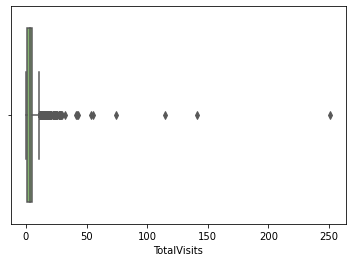

Total Time Spent on Website


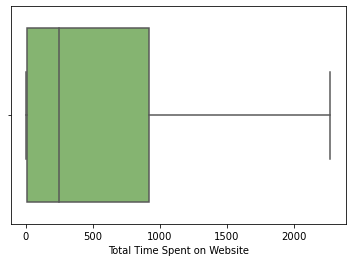

Page Views Per Visit


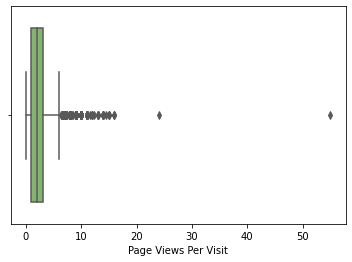

In [48]:
for i in numerical_col:
    print(i)
    sns.boxplot(scoring_data[i],palette='summer')
    plt.show()

Outliers are Present in both the Variables TotalVisits and Page Views Per Visit it should be treated and the value spreaded above median highly in Total Time Spent on Website

Imputing Median to the Misssing values

In [49]:
# Imputing Median as it is a Continueous type
scoring_data['TotalVisits']=scoring_data['TotalVisits'].fillna(scoring_data['TotalVisits'].median())
scoring_data['Page Views Per Visit']=scoring_data['Page Views Per Visit'].fillna(scoring_data['Page Views Per Visit'].median())

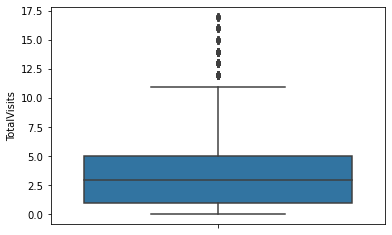

In [50]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = scoring_data.TotalVisits.quantile(0.99)
scoring_data = scoring_data[(scoring_data.TotalVisits <= Q3)]
Q1 = scoring_data.TotalVisits.quantile(0.01)
scoring_data = scoring_data[(scoring_data.TotalVisits >= Q1)]
sns.boxplot(y=scoring_data['TotalVisits'])
plt.show()

In [51]:
scoring_data[pd.isnull(scoring_data).any(axis=1)==True]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity


In [52]:
# Prospect ID and Lead Number are the same thing.So having both the columns is redundant.We will drop the Prospect ID
scoring_data = scoring_data.drop('Prospect ID',axis=1)

In [53]:
# Making lead number as index
scoring_data=scoring_data.set_index('Lead Number')

In [54]:
# Storing column with dtype object and column with dtype number in two different list, so we can easily Perform analysis 
col_obj=list(scoring_data.loc[:, scoring_data.dtypes == np.object].columns)
col_num=list(scoring_data.loc[:, scoring_data.dtypes == np.int64].columns)
col_num+=(list(scoring_data.loc[:, scoring_data.dtypes == np.number].columns))
print('columns with object dtype \n {} \n \n columns with number dtype \n {}'.format(col_obj,col_num))

columns with object dtype 
 ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity'] 
 
 columns with number dtype 
 ['Converted', 'Total Time Spent on Website', 'TotalVisits', 'Page Views Per Visit']


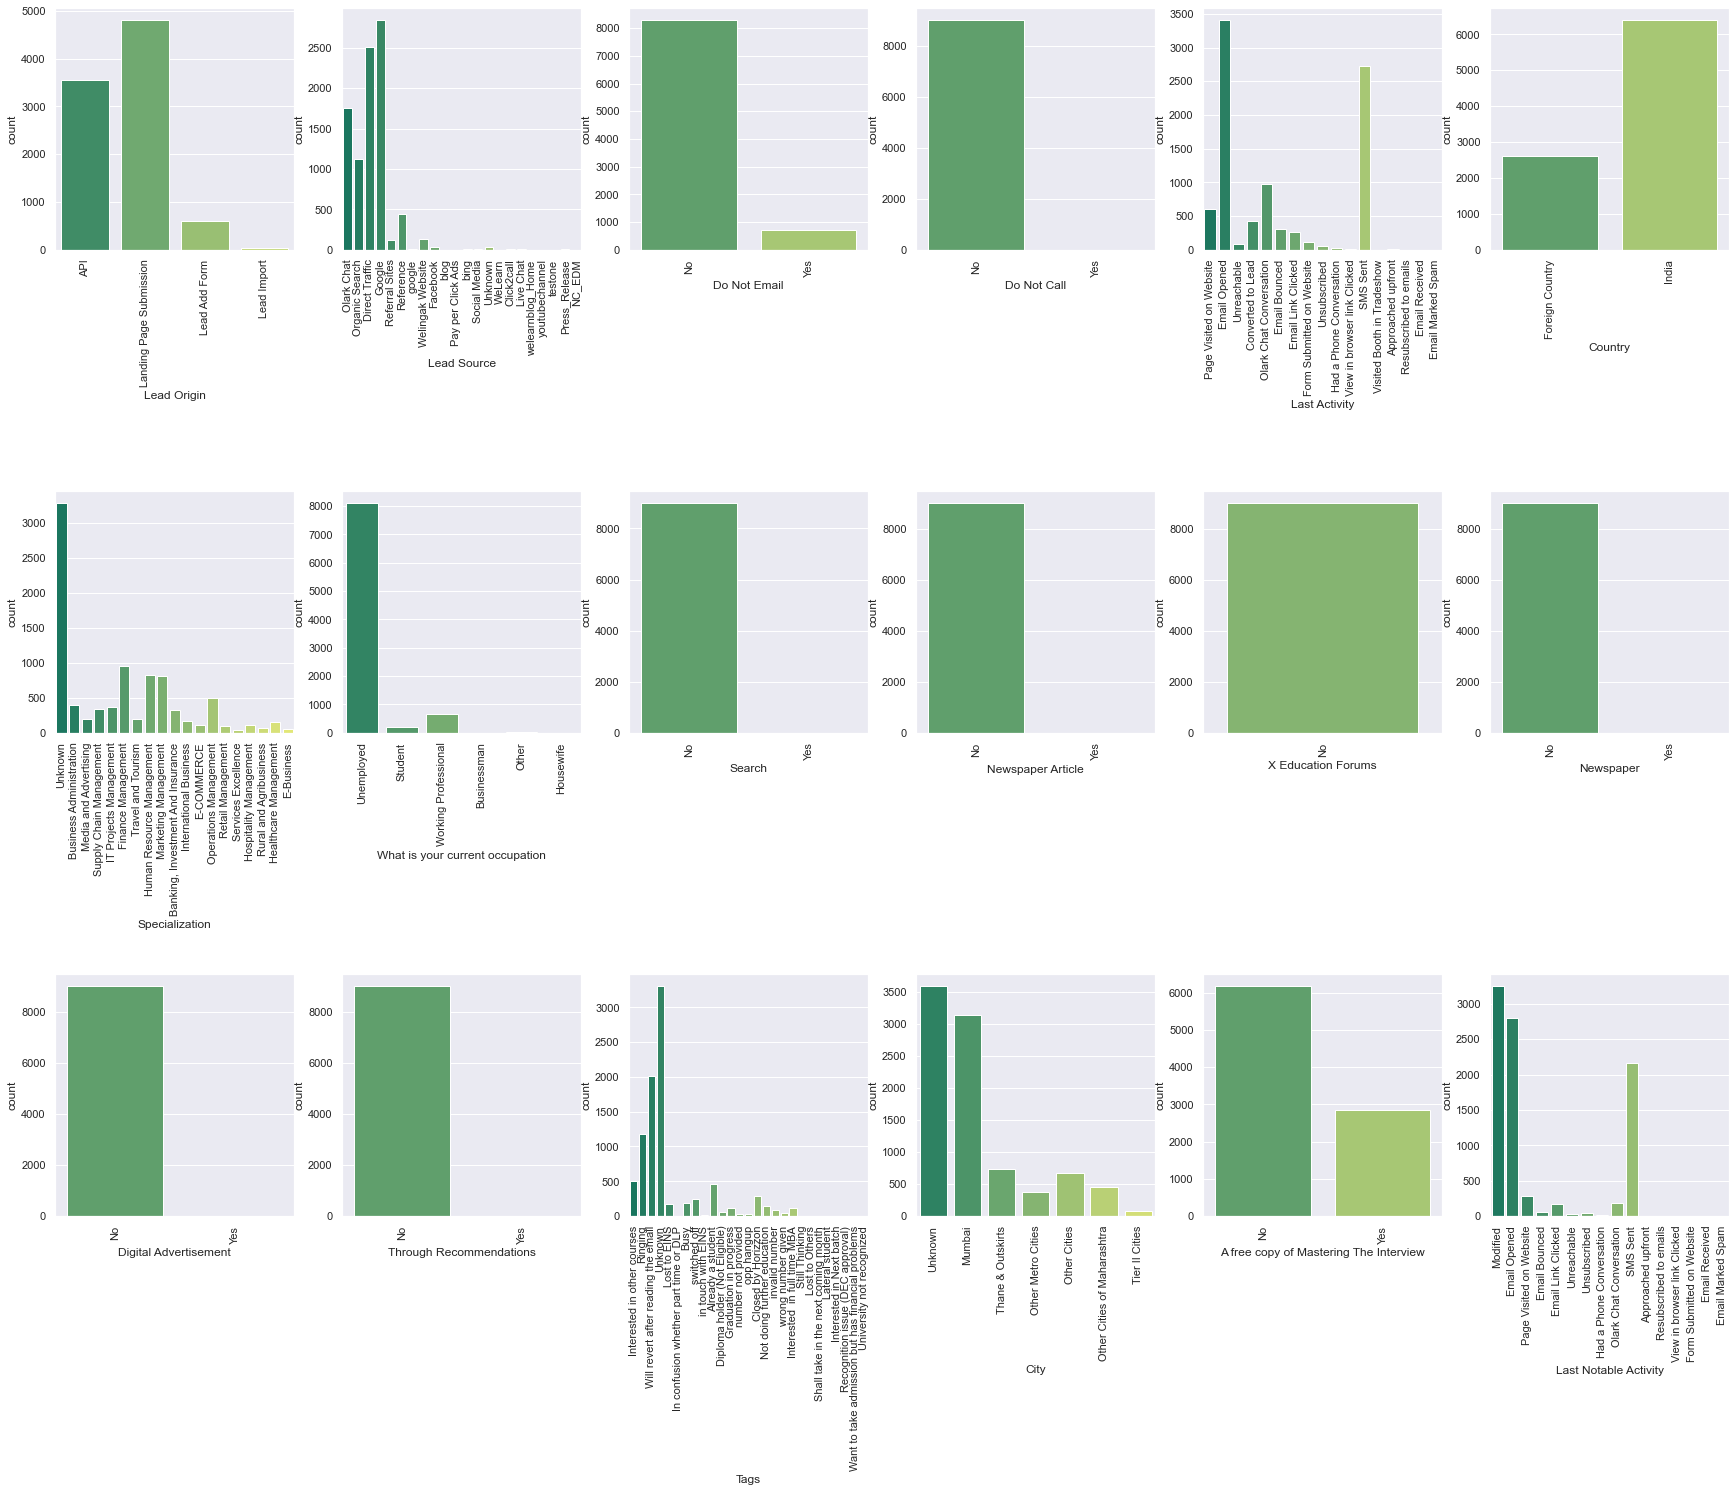

In [55]:
# plotting countplot for object dtype get data distribution
plt.figure(figsize=(30,40))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1 )
for i in enumerate(col_obj):
    plt.subplot(5,6, i[0]+1)
    sns.countplot(i[1],data=scoring_data,palette='summer') 
    plt.xticks(rotation=90)
plt.show()

##### Insights
We can see that there are many colums which are highly skewed or only one values

Removing Highly Skewed variables and if Column contains Single Labels

In [56]:
# Taking care of highly skewed columns  and one value only
scoring_data=scoring_data.drop(['Do Not Call','Search', 'X Education Forums','Newspaper','Newspaper Article','Through Recommendations','Digital Advertisement'],1)

In [57]:
scoring_data.shape

(9020, 15)

### Step 4: Exploratory Data Analysis

#### Univariate Analysis (Categorical)

In [58]:
# crating cols which contains only Categorical variable
cols=scoring_data.loc[:, scoring_data.dtypes == np.object].columns
cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation', 'Tags',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

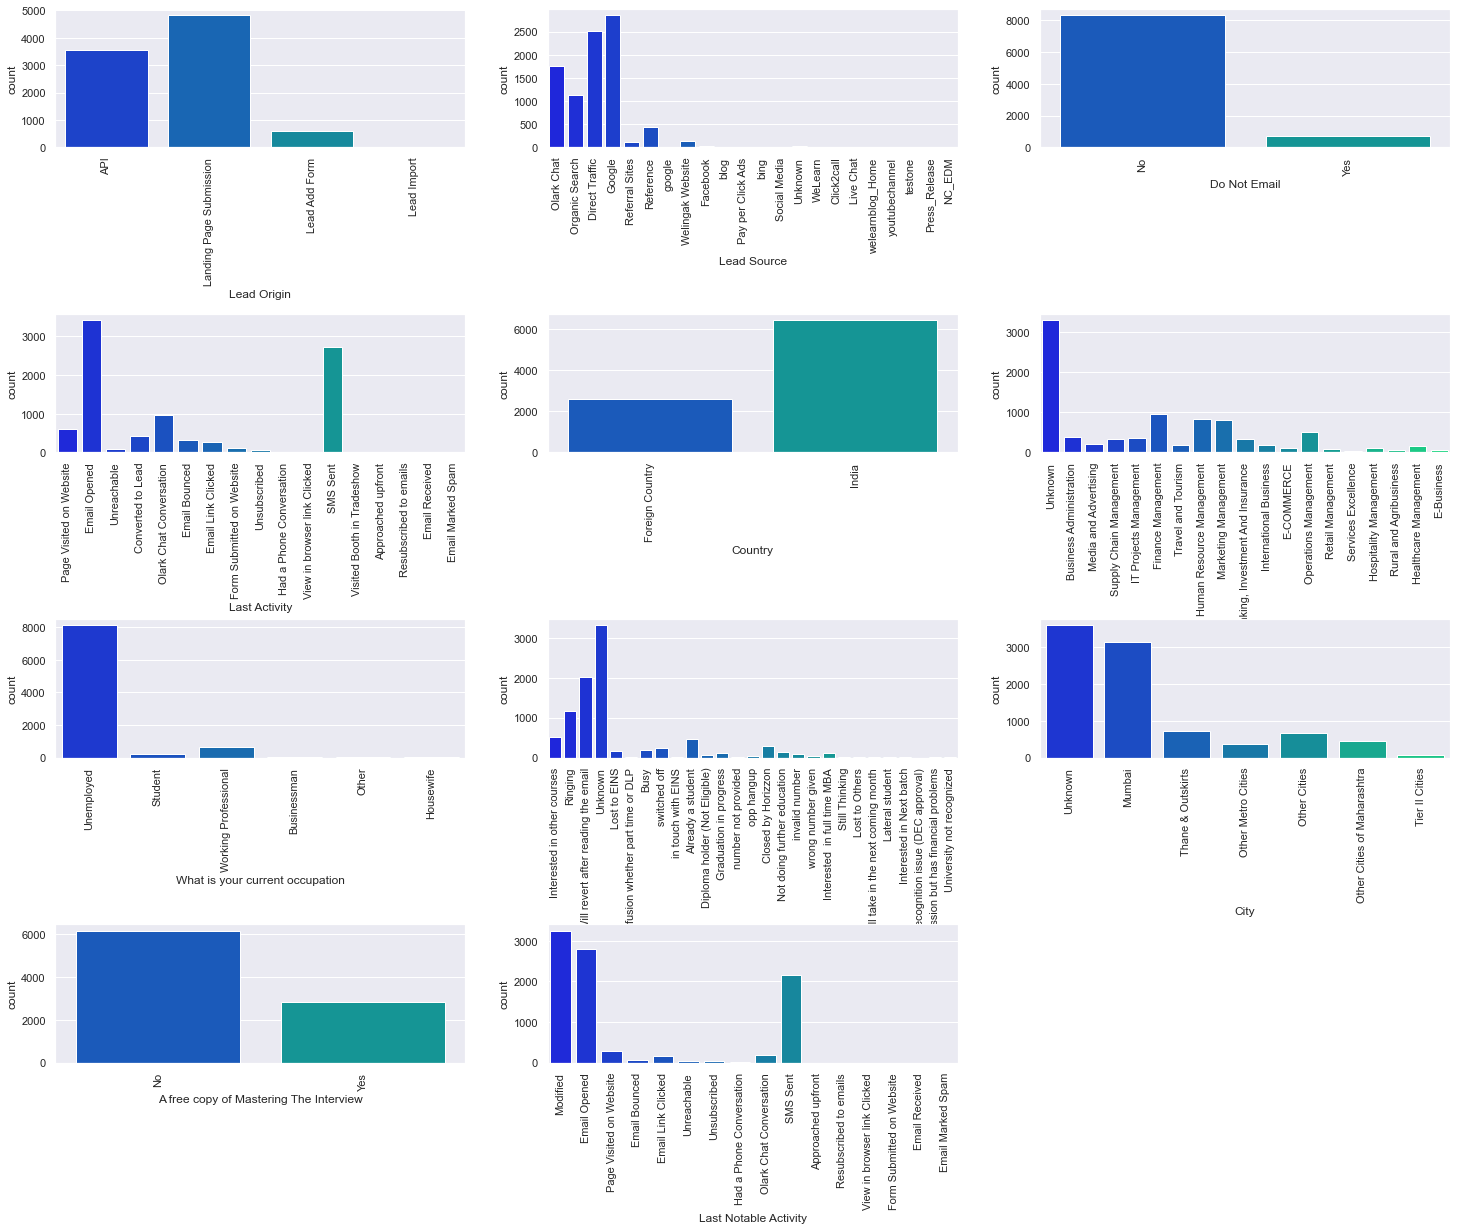

In [59]:
plt.figure(figsize=(25,25))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1.2 )
for i in enumerate(cols):
    plt.subplot(5,3, i[0]+1)
    sns.countplot(i[1],data=scoring_data, palette='winter')
    plt.xticks(rotation=90)
plt.show()

Insights :-
- In Lead Source Direct Traffic and Google are the two main source for Leads
- The Number of values is High in Email Opened and SMS Sent in Last Activity
- Most of the people chooses Finance Management Specialization rather than other Specialization and also most of the values are Unknown
- The IT Project management have very lees so that most of the People not prefered this Specialization

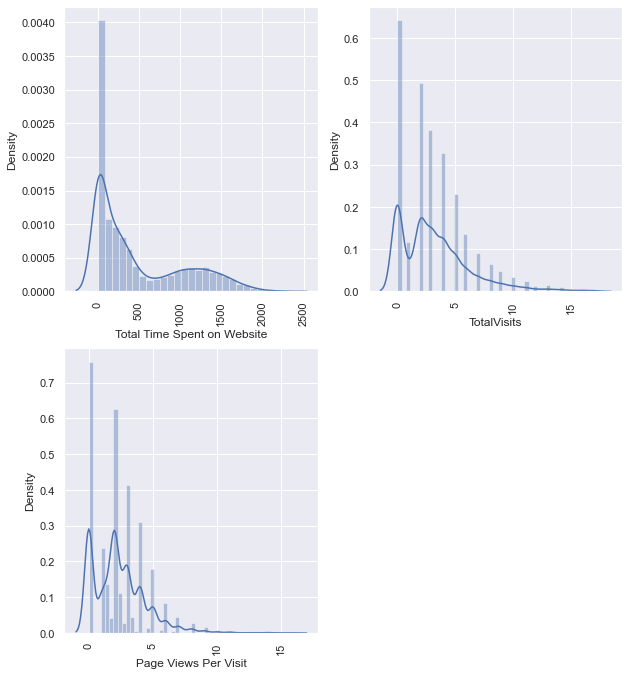

In [60]:
col_num.remove('Converted')

plt.figure(figsize=(10,10))
plt.subplots_adjust(bottom=.01)
for i in enumerate(col_num):
    
    plt.subplot(2,2, i[0]+1)
    sns.distplot(scoring_data[i[1]])
    
    plt.xticks(rotation=90)
plt.show()

Insights :-
- None of the Continueous Variables are in Normal distribution
- Presence of Outliers in Total Visits and Page Views Per Visit
- In total visits more values is between 0-50 and page views per visits 0-20

##### Bivariate Analysis

Bivariate Analysis with Target Column i.e Converted

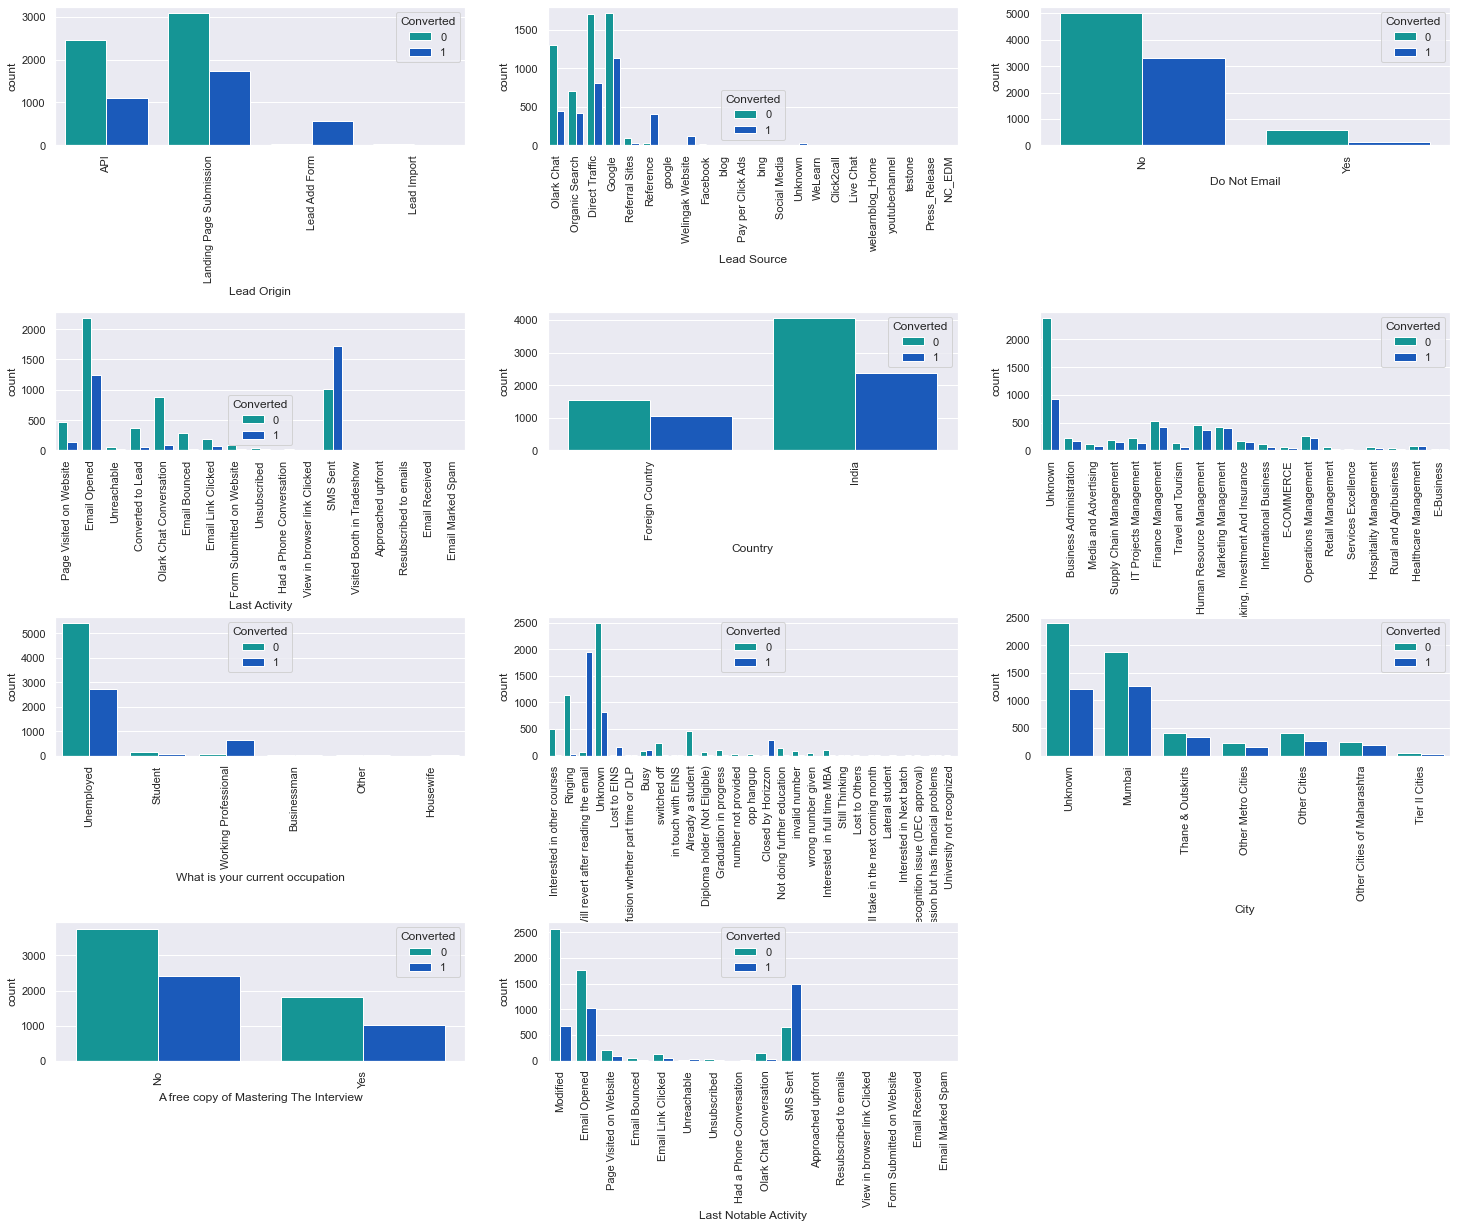

In [61]:
plt.figure(figsize=(25,25))
plt.subplots_adjust(wspace=.2,hspace=1.2 )
for i in enumerate(cols):
    plt.subplot(5,3, i[0]+1)
    sns.countplot(x = i[1],hue = 'Converted', data = scoring_data, palette='winter_r')
    plt.xticks(rotation=90)
plt.show()

Insights :-
- In Lead Source The number of Hot leads is higher in Direct Traffic and Google, less in Other Category
- In Last Activity the number of Hot leads is higher in SMS and in EMAIL cold leads is higher than hot leads.
- In Last Notable Activity it's mostly same as Last Activity.
- In Specialization the most of the leads are comes from Finance management but here Hot leads are lesser than Cold leads
- In City the most of the hot leads are from Mumbai

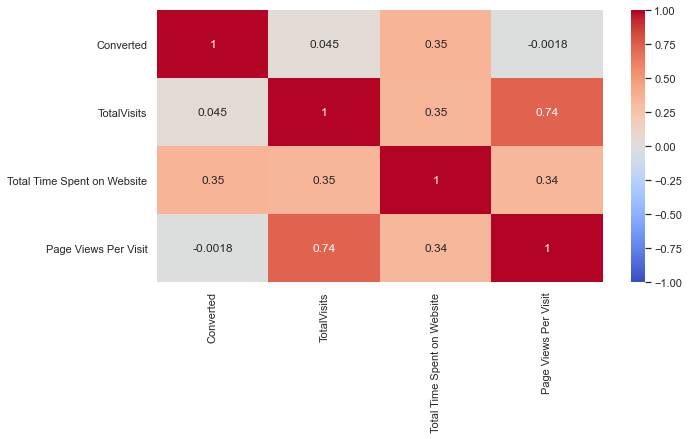

In [62]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(scoring_data.corr(), annot = True, vmin=-1,cmap='coolwarm')
plt.show()

We can see some columns (TotalVisits, Page Views Per Visit) are highly correlated.

### Step 5: Data Preparation and Features Selection

In [63]:
scoring_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,
660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Foreign Country,Unknown,Unemployed,Interested in other courses,Unknown,No,Modified
660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Unknown,Unemployed,Ringing,Unknown,No,Email Opened
660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Unknown,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [66]:
scoring_data['Country'] = scoring_data['Country'].apply(lambda x: 1 if x=='India' else 0)

In [67]:
# Dropping the Last Notable Activity as it is mostly same Last Activity
#We can drop "Tags" ,As tags variable is generated by the sales sales team after the disscussion with student otherwise it will increase the model accuracy .
scoring_data = scoring_data.drop(['Tags', 'Last Notable Activity'],1)

Creating dummies of Categorical Variables

In [68]:
# dummies_df=pd.get_dummies(scoring_data)
# dummies_df.head()

# Create dummy variables using the 'get_dummies'
dummies_df = pd.get_dummies(scoring_data[['Lead Origin','Specialization' ,'Lead Source', 'Last Activity', 'A free copy of Mastering The Interview', 'What is your current occupation','Do Not Email']], drop_first=True)
# Add the results to the master dataframe
dummies_df = pd.concat([scoring_data, dummies_df], axis=1)
dummies_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Unknown,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,A free copy of Mastering The Interview_Yes,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Do Not Email_Yes
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,0,Unknown,Unemployed,Unknown,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,1,Unknown,Unemployed,Unknown,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,1,Business Administration,Student,Mumbai,Yes,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,1,Media and Advertising,Unemployed,Mumbai,No,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,1,Unknown,Unemployed,Mumbai,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [69]:
# dropping columns on basis of anal

dummies_df = dummies_df.drop(['City','Lead Origin', 'Lead Source','Last Activity', 'Specialization', 'Specialization_Unknown','What is your current occupation','Do Not Email','A free copy of Mastering The Interview'], 1)
dummies_df

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Unknown,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,A free copy of Mastering The Interview_Yes,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Do Not Email_Yes
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
660728,0,5.0,674,2.50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
660727,1,2.0,1532,2.00,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
660719,0,1.0,305,1.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
660681,1,2.0,1428,1.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579564,1,8.0,1845,2.67,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
579546,0,2.0,238,2.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
579545,0,2.0,199,2.00,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1


#### Splitting the Data into Training and Testing Sets

In [70]:
X=dummies_df.drop(['Converted'], 1)
y=dummies_df[['Converted']]

In [71]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=.7,test_size=.3,random_state=1)

##### scaling the Features

In [72]:
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Unknown,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,A free copy of Mastering The Interview_Yes,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Do Not Email_Yes
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
580849,0.117647,0.147359,0.125000,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
607221,0.000000,0.000000,0.000000,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
581303,0.235294,0.298713,0.125000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
580449,0.117647,0.337772,0.125000,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
613352,0.235294,0.446072,0.083125,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [73]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Unknown,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,A free copy of Mastering The Interview_Yes,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Do Not Email_Yes
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
580849,0.117647,0.147359,0.125000,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
607221,0.000000,0.000000,0.000000,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
581303,0.235294,0.298713,0.125000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
580449,0.117647,0.337772,0.125000,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
613352,0.235294,0.446072,0.083125,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [74]:
# Using rfe for features selection
lr = LogisticRegression()

In [75]:
# Running RFE with the output number of the variable equal to 15
rfe = RFE(lr, 15)
rfe = rfe.fit(X_train, y_train)

In [76]:
rfe.support_

array([ True,  True,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
        True,  True, False, False, False, False, False,  True,  True,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False,  True,  True])

In [77]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Country', False, 45),
 ('Lead Origin_Landing Page Submission', False, 22),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('Specialization_Business Administration', False, 23),
 ('Specialization_E-Business', False, 16),
 ('Specialization_E-COMMERCE', False, 15),
 ('Specialization_Finance Management', False, 24),
 ('Specialization_Healthcare Management', False, 18),
 ('Specialization_Hospitality Management', False, 32),
 ('Specialization_Human Resource Management', False, 25),
 ('Specialization_IT Projects Management', False, 20),
 ('Specialization_International Business', False, 27),
 ('Specialization_Marketing Management', False, 17),
 ('Specialization_Media and Advertising', False, 39),
 ('Specialization_Operations Management', False, 26),
 ('Specialization_Retail Management', False, 49),
 ('Specialization_Rural and Agribusiness', False, 21)

In [78]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Do Not Email_Yes'],
      dtype='object')

In [79]:
X_train.columns[~rfe.support_]

Index(['Country', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Sour

All the variables selected by RFE, next statistics part (p-values and the VIFs)

### Step 6: Building a Logistic Regression using statsmodel, for the detailed statistics

#### Model 1

In [80]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6298
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2659.0
Date:                Wed, 01 Mar 2023   Deviance:                       5318.1
Time:                        21:59:10   Pearson chi2:                 6.63e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4912      0.106    -23.472      0.000      -2.699      -2.283
TotalVisits                                              1.3912      0.282      4.942      0.000       0.839       1.943
Total Time Spent on Website                              4.6471      0.166     28.061      0.000       4.323       4.972
Page Views Per Visit                                    -1.3299      0.418     -3.185      0.001      -2.148      -0.511
Lead Origin_Lead Add Form                                3.3712      0.595      5.662      0.000       2.204       4.538
Lead Source_Olark Chat                                   1.3343      0.124     10.751      0.000       1.091       1.578
Lead Source_Reference                                    0.7475      0.633      1.181      0.237      -0.493       1.988
Lead Source_Welingak Website                             2.4621      0.929      2.651      0.008       0.642       4.282
Last Activity_Converted to Lead                         -1.0550      0.219     -4.818      0.000      -1.484      -0.626
Last Activity_Email Bounced                             -1.2701      0.442     -2.876      0.004      -2.136      -0.404
Last Activity_Had a Phone Conversation                   2.0839      0.691      3.018      0.003       0.730       3.437
Last Activity_Olark Chat Conversation                   -1.4685      0.159     -9.263      0.000      -1.779      -1.158
Last Activity_SMS Sent                                   1.2766      0.075     16.912      0.000       1.129       1.425
What is your current occupation_Housewife               23.2390   1.57e+04      0.001      0.999   -3.08e+04    3.08e+04
What is your current occupation_Working Professional     2.9011      0.192     15.085      0.000       2.524       3.278
Do Not Email_Yes                                        -1.2831      0.184     -6.984      0.000      -1.643      -0.923
========================================================================================================================
"""

In [81]:
# Function to calculate VIF
def vifcalc(df):
    vif = pd.DataFrame()

    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [82]:
vifcalc(X_train[col])

,Features,VIF
3,Lead Origin_Lead Add Form,16.70
5,Lead Source_Reference,12.78
2,Page Views Per Visit,4.94
6,Lead Source_Welingak Website,4.88
0,TotalVisits,4.67
1,Total Time Spent on Website,2.04
14,Do Not Email_Yes,1.79
8,Last Activity_Email Bounced,1.72
11,Last Activity_SMS Sent,1.55
4,Lead Source_Olark Chat,1.42


Last Activity_Email Received is insignificant because it has high p-value in presence of other variables so it should be dropped

In [83]:
col = col.drop(['What is your current occupation_Housewife'], 1)

#### Model 2

In [84]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2665.8
Date:                Wed, 01 Mar 2023   Deviance:                       5331.7
Time:                        21:59:10   Pearson chi2:                 6.64e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3826
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4757      0.106    -23.393      0.000      -2.683      -2.268
TotalVisits                                              1.3726      0.281      4.881      0.000       0.821       1.924
Total Time Spent on Website                              4.6433      0.165     28.073      0.000       4.319       4.967
Page Views Per Visit                                    -1.3321      0.417     -3.193      0.001      -2.150      -0.514
Lead Origin_Lead Add Form                                3.3610      0.595      5.647      0.000       2.194       4.527
Lead Source_Olark Chat                                   1.3227      0.124     10.676      0.000       1.080       1.566
Lead Source_Reference                                    0.7618      0.633      1.204      0.228      -0.478       2.002
Lead Source_Welingak Website                             2.4608      0.928      2.650      0.008       0.641       4.281
Last Activity_Converted to Lead                         -1.0661      0.219     -4.872      0.000      -1.495      -0.637
Last Activity_Email Bounced                             -1.2765      0.442     -2.891      0.004      -2.142      -0.411
Last Activity_Had a Phone Conversation                   2.0746      0.690      3.005      0.003       0.722       3.428
Last Activity_Olark Chat Conversation                   -1.4733      0.158     -9.297      0.000      -1.784      -1.163
Last Activity_SMS Sent                                   1.2683      0.075     16.823      0.000       1.121       1.416
What is your current occupation_Working Professional     2.8953      0.192     15.058      0.000       2.518       3.272
Do Not Email_Yes                                        -1.2857      0.184     -7.000      0.000      -1.646      -0.926
========================================================================================================================
"""

In [85]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
3,Lead Origin_Lead Add Form,16.70
5,Lead Source_Reference,12.78
2,Page Views Per Visit,4.94
6,Lead Source_Welingak Website,4.88
0,TotalVisits,4.67
1,Total Time Spent on Website,2.04
13,Do Not Email_Yes,1.79
8,Last Activity_Email Bounced,1.72
11,Last Activity_SMS Sent,1.55
4,Lead Source_Olark Chat,1.42


Specialization_Healthcare Management should be drop as high p-value is present

In [86]:
col = col.drop('Lead Source_Reference',1)

#### Model 3

In [87]:
X_train_sm=sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2666.5
Date:                Wed, 01 Mar 2023   Deviance:                       5333.0
Time:                        21:59:10   Pearson chi2:                 6.62e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3825
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4744      0.106    -23.381      0.000      -2.682      -2.267
TotalVisits                                              1.3714      0.281      4.876      0.000       0.820       1.923
Total Time Spent on Website                              4.6426      0.165     28.068      0.000       4.318       4.967
Page Views Per Visit                                    -1.3313      0.417     -3.191      0.001      -2.149      -0.513
Lead Origin_Lead Add Form                                4.0359      0.238     16.933      0.000       3.569       4.503
Lead Source_Olark Chat                                   1.3217      0.124     10.665      0.000       1.079       1.565
Lead Source_Welingak Website                             1.7865      0.752      2.377      0.017       0.313       3.260
Last Activity_Converted to Lead                         -1.0672      0.219     -4.877      0.000      -1.496      -0.638
Last Activity_Email Bounced                             -1.2685      0.442     -2.872      0.004      -2.134      -0.403
Last Activity_Had a Phone Conversation                   2.0743      0.691      3.004      0.003       0.721       3.428
Last Activity_Olark Chat Conversation                   -1.4736      0.158     -9.300      0.000      -1.784      -1.163
Last Activity_SMS Sent                                   1.2669      0.075     16.808      0.000       1.119       1.415
What is your current occupation_Working Professional     2.8967      0.192     15.070      0.000       2.520       3.273
Do Not Email_Yes                                        -1.2955      0.184     -7.043      0.000      -1.656      -0.935
========================================================================================================================
"""

In [88]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
2,Page Views Per Visit,4.94
0,TotalVisits,4.67
1,Total Time Spent on Website,2.04
12,Do Not Email_Yes,1.78
7,Last Activity_Email Bounced,1.72
10,Last Activity_SMS Sent,1.55
3,Lead Origin_Lead Add Form,1.47
4,Lead Source_Olark Chat,1.42
9,Last Activity_Olark Chat Conversation,1.40
5,Lead Source_Welingak Website,1.33


- Here we got all the p-value are under 0.05 and VIF is also under 5
- It can take as a Final Model

In [90]:
# Prediciting values on ytrain
y_train_pred = logm3.predict(X_train_sm).values.reshape(-1)

In [91]:
y_train_pred_final = pd.DataFrame({'Converted':y_train['Converted'], 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.reset_index(drop=True, inplace=True)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,1,0.142424,580849
1,1,0.988550,607221
2,1,0.282665,581303
3,0,0.286738,580449
4,1,0.745648,613352


In [92]:
#  let's take 0.5 as Cutoff
y_train_pred_final['Converted_pred']=y_train_pred_final['Converted_Prob'].apply(lambda x : 1 if x>0.5 else 0)

In [93]:
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred
0,1,0.142424,580849,0
1,1,0.988550,607221,1
2,1,0.282665,581303,0
3,0,0.286738,580449,0
4,1,0.745648,613352,1


In [94]:
# Finding the metrics like accuracy, sensitivity and specicity 
def metrices_(converted,predicted):
    cm1 = metrics.confusion_matrix(converted,predicted)
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    return accuracy,sensi,speci

In [95]:
acc,sensi,speci=metrices_(y_train_pred_final.Converted,y_train_pred_final.Converted_pred)

print('Accuracy: {}, Sensitivity {}, specitiy {}'.format(acc,sensi,speci))

Accuracy: 0.8137472283813747, Sensitivity 0.699581589958159, specitiy 0.8832823649337411


Here we got low Sensitivity when randomly take the Cutoff as 0.5

In [96]:
# Finding the Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_pred )
confusion

array([[3466,  458],
       [ 718, 1672]], dtype=int64)

In [97]:
# Finding the TP, TN, FP, FN
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negative

In [98]:
# Calculate false postive rate -
print(FP/ float(TN+FP))

0.11671763506625892


In [99]:
# positive predictive value 
print (TP / float(TP+FP))

0.7849765258215963


In [100]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8283938814531548


In [101]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [102]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )


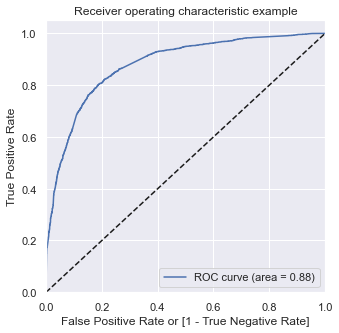

In [103]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [104]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.142424,580849,0,1,1,0,0,0,0,0,0,0,0
1,1,0.988550,607221,1,1,1,1,1,1,1,1,1,1,1
2,1,0.282665,581303,0,1,1,1,0,0,0,0,0,0,0
3,0,0.286738,580449,0,1,1,1,0,0,0,0,0,0,0
4,1,0.745648,613352,1,1,1,1,1,1,1,1,1,0,0


In [105]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378524  1.000000  0.000000
0.1   0.1  0.597719  0.968201  0.372069
0.2   0.2  0.729648  0.927197  0.609327
0.3   0.3  0.797751  0.828033  0.779307
0.4   0.4  0.815965  0.762762  0.848369
0.5   0.5  0.813747  0.699582  0.883282
0.6   0.6  0.792683  0.579498  0.922528
0.7   0.7  0.778429  0.501674  0.946993
0.8   0.8  0.754039  0.403347  0.967635
0.9   0.9  0.707951  0.249372  0.987258


<Figure size 1440x1440 with 0 Axes>

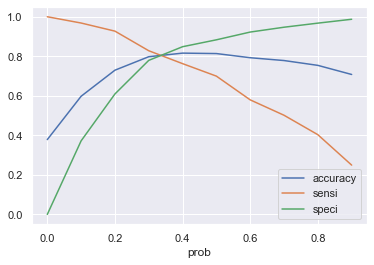

In [106]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(20,20))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Taking value 3.7 as the Final Cutoff

In [107]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.142424,580849,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.988550,607221,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.282665,581303,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.286738,580449,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.745648,613352,1,1,1,1,1,1,1,1,1,0,0,1


In [108]:
# Printing the Metrics Accuracy, Sensitivity, Specicity
acc,sensi,speci=metrices_(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
print('Accuracy: {}, Sensitivity {}, specifitiy {}  '.format(acc,sensi,speci))

Accuracy: 0.8110547988596769, Sensitivity 0.7811715481171548, specifitiy 0.8292558613659531  


In [109]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_pred )
confusion

array([[3466,  458],
       [ 718, 1672]], dtype=int64)

In [110]:
# Finding the Precision Score
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7359085534095389

In [111]:
# Finding the Recall Score
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7811715481171548

In [112]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

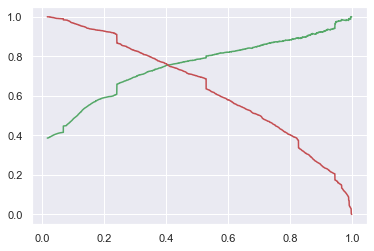

In [113]:
plt.plot(thresholds, p[:-1], "g-",label='Precision')
plt.plot(thresholds, r[:-1], "r-",label='Recall')
plt.show()

Here we got 0.37 as the Cut-off as Precesion-Recall Threshold

##### Making Prediction on test set

Scaling on Test Set

In [114]:
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]=scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])


In [117]:
#Adding constant
X_test_sm = sm.add_constant(X_test[col])
#Making prediction
y_test_pred = logm3.predict(X_test_sm)
y_test_pred[:10]

Lead Number
659685    1.000000
642307    0.944197
620474    0.528541
591446    0.019422
645530    1.000000
630013    1.000000
595137    1.000000
650820    1.000000
614498    0.944197
588553    1.000000
dtype: float64

In [118]:
# Converting y_pred to a dataframe which is an array
y_pred_test = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['Lead Number'] = y_test_df.index

In [119]:
# Removing index for both dataframes to append them side by side 
y_pred_test.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [120]:
# Appending y_test_df and y_pred_test
y_pred_final = pd.concat([y_test_df, y_pred_test],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [121]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,0,659685,1.000000
1,1,642307,0.944197
2,1,620474,0.528541
3,0,591446,0.019422
4,1,645530,1.000000


In [122]:
y_pred_final['final_test_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [123]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_test_predicted
0,0,659685,1.000000,1
1,1,642307,0.944197,1
2,1,620474,0.528541,1
3,0,591446,0.019422,0
4,1,645530,1.000000,1


In [124]:
acc,sensi,speci=metrices_(y_pred_final.Converted,y_pred_final.final_test_predicted)

In [125]:
print('Accuracy: {}, Sensitivity {}, specitiy {}  '.format(acc,sensi,speci))

Accuracy: 0.49297856614929786, Sensitivity 0.9468599033816425, specitiy 0.2118491921005386  


- We can see that our model is doing well in test set also
- Sensitivity means how our model is telling that actually converted and model prdecited them as as converted.
- We can see that our model is giving about .80 sensitivity.it means that 80 percent time our model is able to predict (actually)converted as (prdicited)converted.

###### Assigning Lead Score in the data frame with respect to Lead Number

In [126]:
# making new df with lead score
lead_scorer_df=pd.DataFrame()
df1=y_train_pred_final[['Lead Number','Converted_Prob']]
df2=y_pred_final[['Lead Number','Converted_Prob']]

In [127]:
lead_scorer_df=df1.append(df2,ignore_index=True)

In [128]:
# Assigning the value to the Lead Score by Multiplying 100
lead_scorer_df['Lead Score']=lead_scorer_df['Converted_Prob'].apply(lambda x: round((x*100),2))

In [129]:
# dropping Converted_Prob
lead_scorer_df.drop('Converted_Prob',1,inplace=True)
lead_scorer_df.head()

,Lead Number,Lead Score
0,580849,14.24
1,607221,98.86
2,581303,28.27
3,580449,28.67
4,613352,74.56


- Got the Lead Score with respect to Lead Number

##### Conclusion

#### We have noted that the variables that important the most in the potential buyers are:
- TotalVisits
- Total Time Spent on Website	
- Page Views Per Visit	
- Lead Origin_Lead Add Form	
- Lead Source_Olark Chat	
- Lead Source_Welingak Website	
- Last Activity_Converted to Lead	
- Last Activity_Email Bounced	
- Last Activity_Had a Phone Conversation	
- Last Activity_Olark Chat Conversation	
- Last Activity_SMS Sent	
- What is your current occupation_Working Professional	
- Do Not Email_Yes

##### Keeping these variables in mind the X Education can be at top as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.